<a href="https://colab.research.google.com/github/MIlhamEr/Skripsi/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import Function

In [2]:
def plot_stock_data(df):
    plt.figure(figsize=(16, 5))

    plt.plot(df['Date'].values, df.Open.values, color='orange', label='Open')
    plt.plot(df['Date'].values, df.Close.values, color='green', label='Close')
    plt.plot(df['Date'].values, df.Low.values, color='blue', label='Low')
    plt.plot(df['Date'].values, df.High.values, color='red', label='High')
    plt.xticks(np.arange(20,df.shape[0],50), rotation=20)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.show()

In [3]:
def plot_correlation_heatmap(df):
  df = df.drop(columns=["Date"])
  plt.figure(figsize=(8,6))
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
  plt.title("Correlation Heatmap")
  plt.show()

In [4]:
def plot_histogram(df):
    plt.figure(figsize=(16, 12))

    plt.subplot(3, 2, 1)
    sns.histplot(df['Open'], bins=30, color='blue', fill=False, stat='density')
    sns.kdeplot(df['Open'], color='red')
    plt.ylabel("Frequency")

    plt.subplot(3, 2, 2)
    sns.histplot(df['Close'], bins=30, color='blue', fill=False, stat='density')
    sns.kdeplot(df['Close'], color='red')
    plt.ylabel("Frequency")

    plt.subplot(3, 2, 3)
    sns.histplot(df['High'], bins=30, color='blue', fill=False, stat='density')
    sns.kdeplot(df['High'], color='red')
    plt.ylabel("Frequency")

    plt.subplot(3, 2, 4)
    sns.histplot(df['Low'], bins=30, color='blue', fill=False, stat='density')
    sns.kdeplot(df['Low'], color='red')
    plt.ylabel("Frequency")

    plt.subplot(3, 2, 5)
    sns.histplot(df['Adj Close'], bins=30, color='blue', fill=False, stat='density')
    sns.kdeplot(df['Adj Close'], color='red')
    plt.ylabel("Frequency")

    plt.subplot(3, 2, 6)
    sns.histplot(df['Volume'], bins=30, color='blue', fill=False, stat='density')
    sns.kdeplot(df['Volume'], color='red')
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Reading Dataset

## ADRO

In [5]:
url_adro = "https://raw.githubusercontent.com/MIlhamEr/Skripsi/refs/heads/main/dataset/PT%20Adaro%20Energy%20Indonesia%20Tbk_2020-2024.csv"
adro = pd.read_csv(url_adro)
adro.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1555.0,1555.0,1490.0,1495.0,835.632202,76612000
1,2020-01-03,1460.0,1470.0,1425.0,1465.0,856.372375,117795600
2,2020-01-06,1455.0,1515.0,1450.0,1465.0,856.372375,61423200
3,2020-01-07,1480.0,1540.0,1460.0,1540.0,900.213867,74336500
4,2020-01-08,1530.0,1535.0,1505.0,1505.0,879.754395,55121100


In [6]:
adro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1148 non-null   object 
 1   Open       1148 non-null   float64
 2   High       1148 non-null   float64
 3   Low        1148 non-null   float64
 4   Close      1148 non-null   float64
 5   Adj Close  1148 non-null   float64
 6   Volume     1148 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.9+ KB


In [7]:
adro.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1.148000e+03
mean,2239.446864,2276.310976,2201.424216,2236.968641,1712.117432,8.789910e+07
std,913.246493,924.842031,902.619093,914.395266,865.515071,6.871220e+07
min,645.000000,670.000000,610.000000,645.000000,377.037598,0.000000e+00
25%,1270.000000,1295.000000,1240.000000,1260.000000,782.738098,4.269002e+07
50%,2400.000000,2425.000000,2370.000000,2400.000000,1984.760681,6.984515e+07
75%,2910.000000,2950.000000,2870.000000,2910.000000,2353.506042,1.077192e+08
max,4140.000000,4250.000000,4080.000000,4140.000000,3910.000000,5.399952e+08


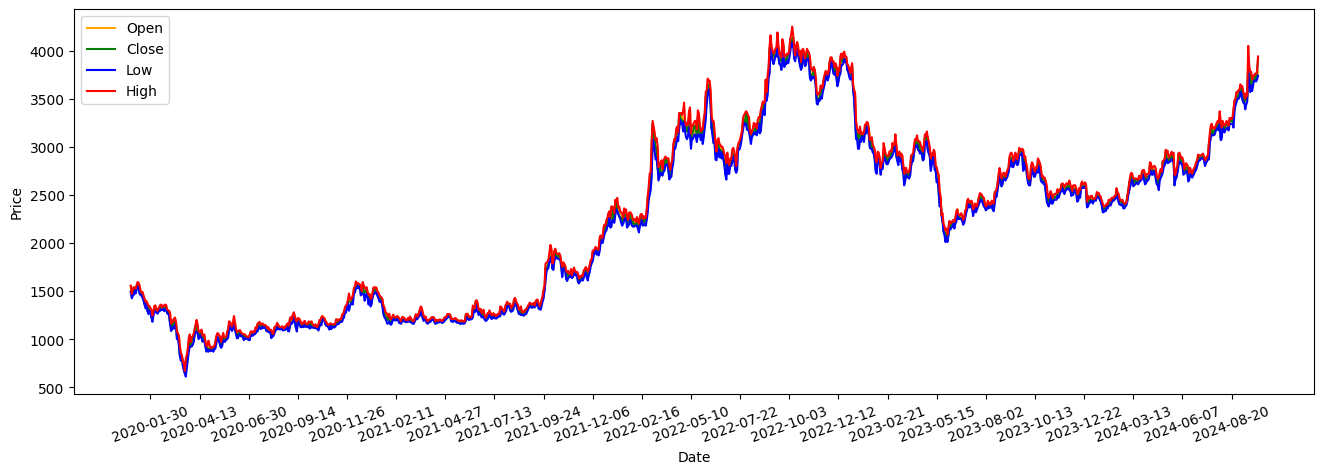

In [8]:
plot_stock_data(adro)

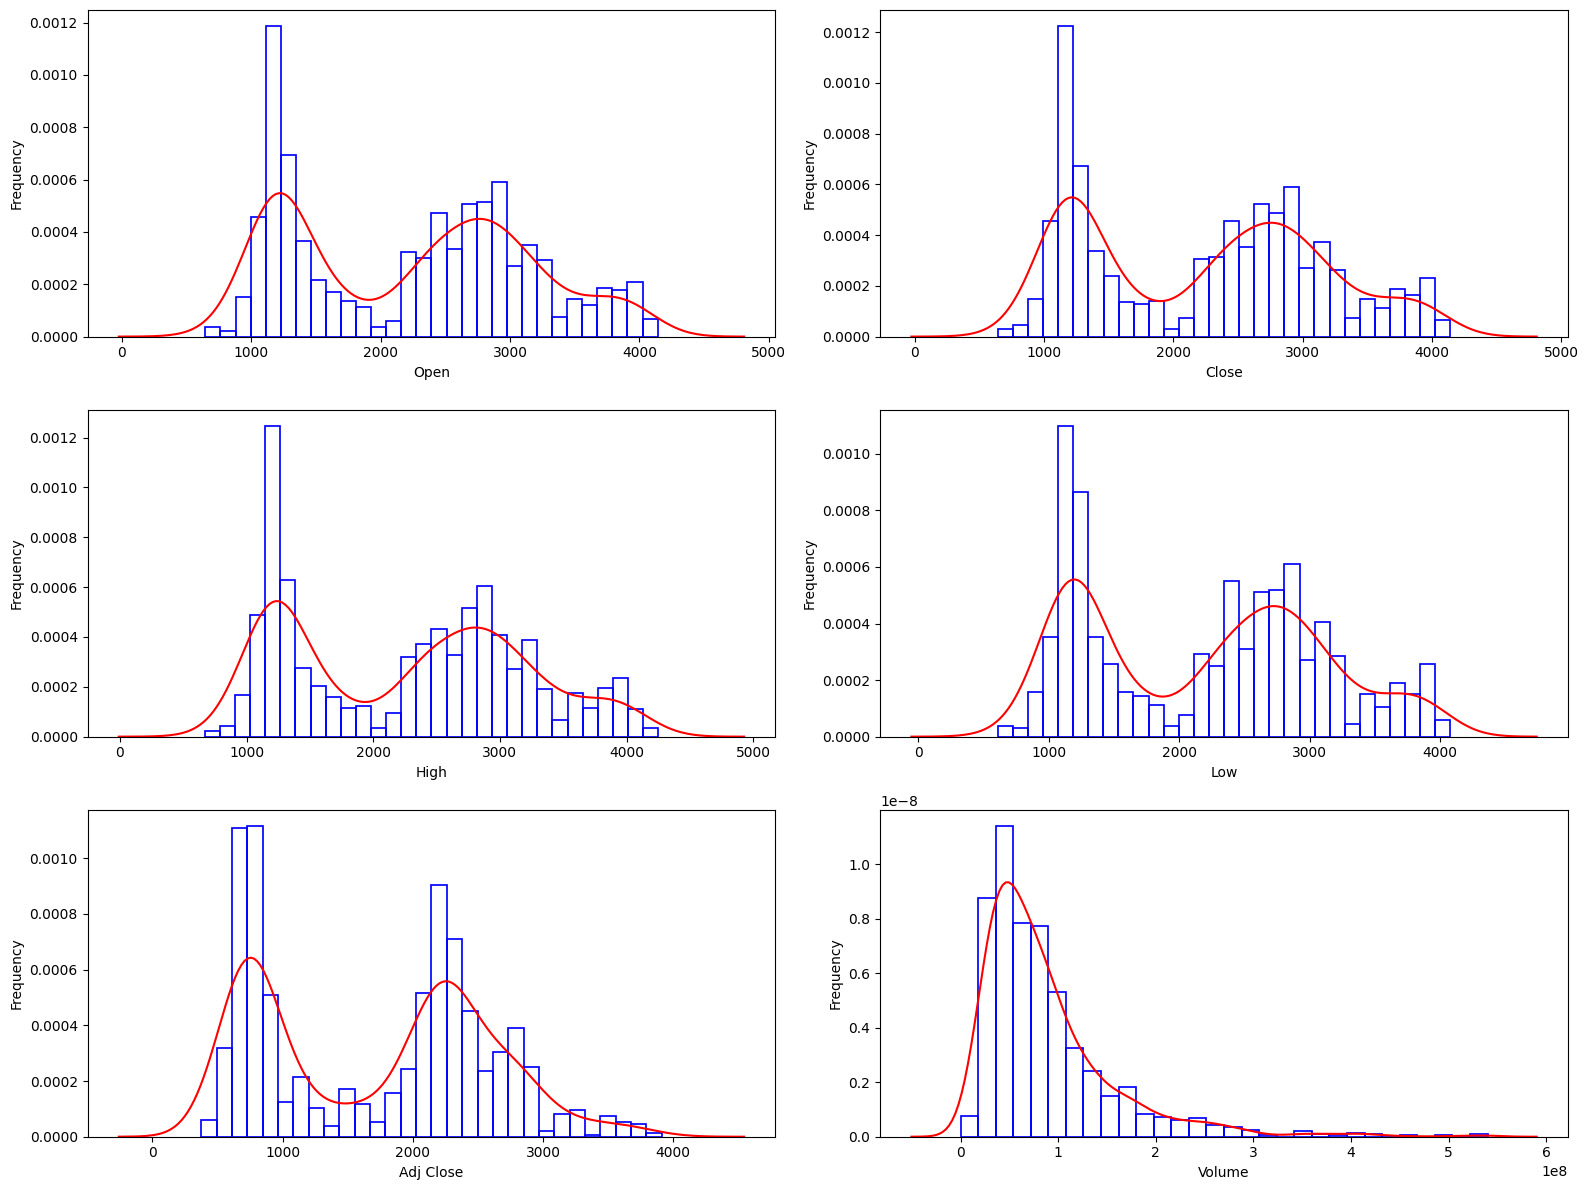

In [9]:
plot_histogram(adro)

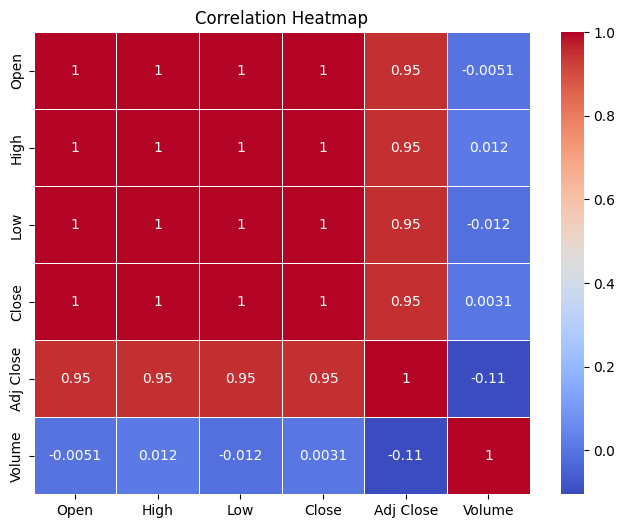

In [10]:
plot_correlation_heatmap(adro)

## DSSA

In [11]:
url_dssa = "https://raw.githubusercontent.com/MIlhamEr/Skripsi/refs/heads/main/dataset/PT%20Dian%20Swastatika%20Sentosa%20Tbk_2020-2024.csv"
dssa = pd.read_csv(url_dssa)
dssa.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1360.0,1435.0,1360.0,1435.0,1435.0,5000
1,2020-01-03,1435.0,1435.0,1435.0,1435.0,1435.0,0
2,2020-01-06,1437.5,1437.5,1435.0,1435.0,1435.0,3000
3,2020-01-07,1435.0,1435.0,1435.0,1435.0,1435.0,0
4,2020-01-08,1435.0,1435.0,1435.0,1435.0,1435.0,0


In [12]:
dssa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1148 non-null   object 
 1   Open       1148 non-null   float64
 2   High       1148 non-null   float64
 3   Low        1148 non-null   float64
 4   Close      1148 non-null   float64
 5   Adj Close  1148 non-null   float64
 6   Volume     1148 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.9+ KB


In [13]:
dssa.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1.148000e+03
mean,5894.359756,5987.554443,5857.016551,5930.013066,5930.013066,1.141948e+05
std,8180.650973,8370.349907,8089.417254,8228.663219,8228.663219,5.108930e+05
min,910.000000,920.000000,910.000000,920.000000,920.000000,0.000000e+00
25%,1750.000000,1787.500000,1750.000000,1787.500000,1787.500000,0.000000e+00
50%,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,1.000000e+03
75%,5000.000000,5000.000000,4995.000000,5000.000000,5000.000000,1.000000e+04
max,42350.000000,44775.000000,41550.000000,41875.000000,41875.000000,1.200000e+07


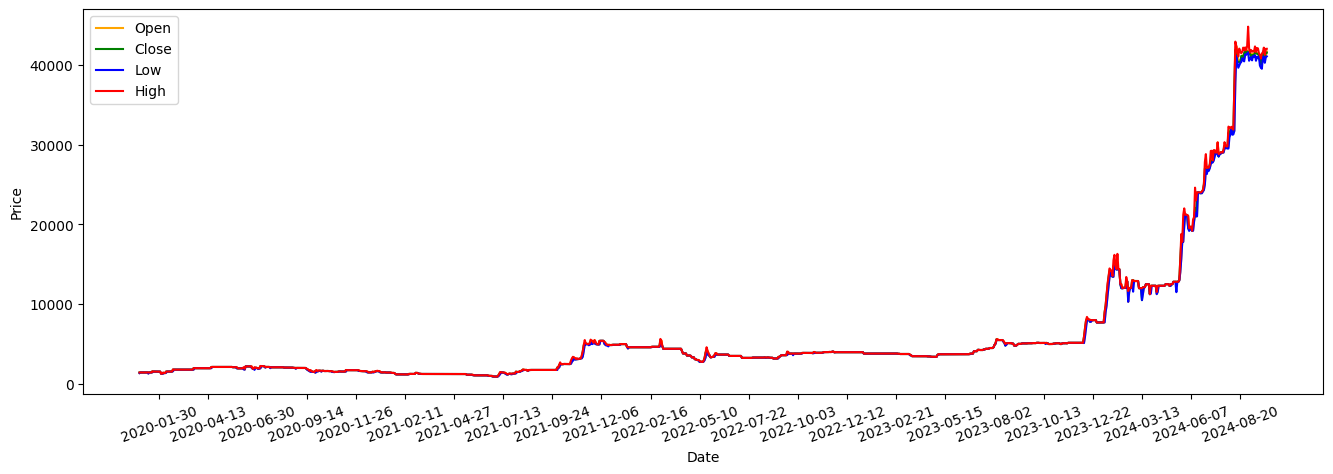

In [14]:
plot_stock_data(dssa)

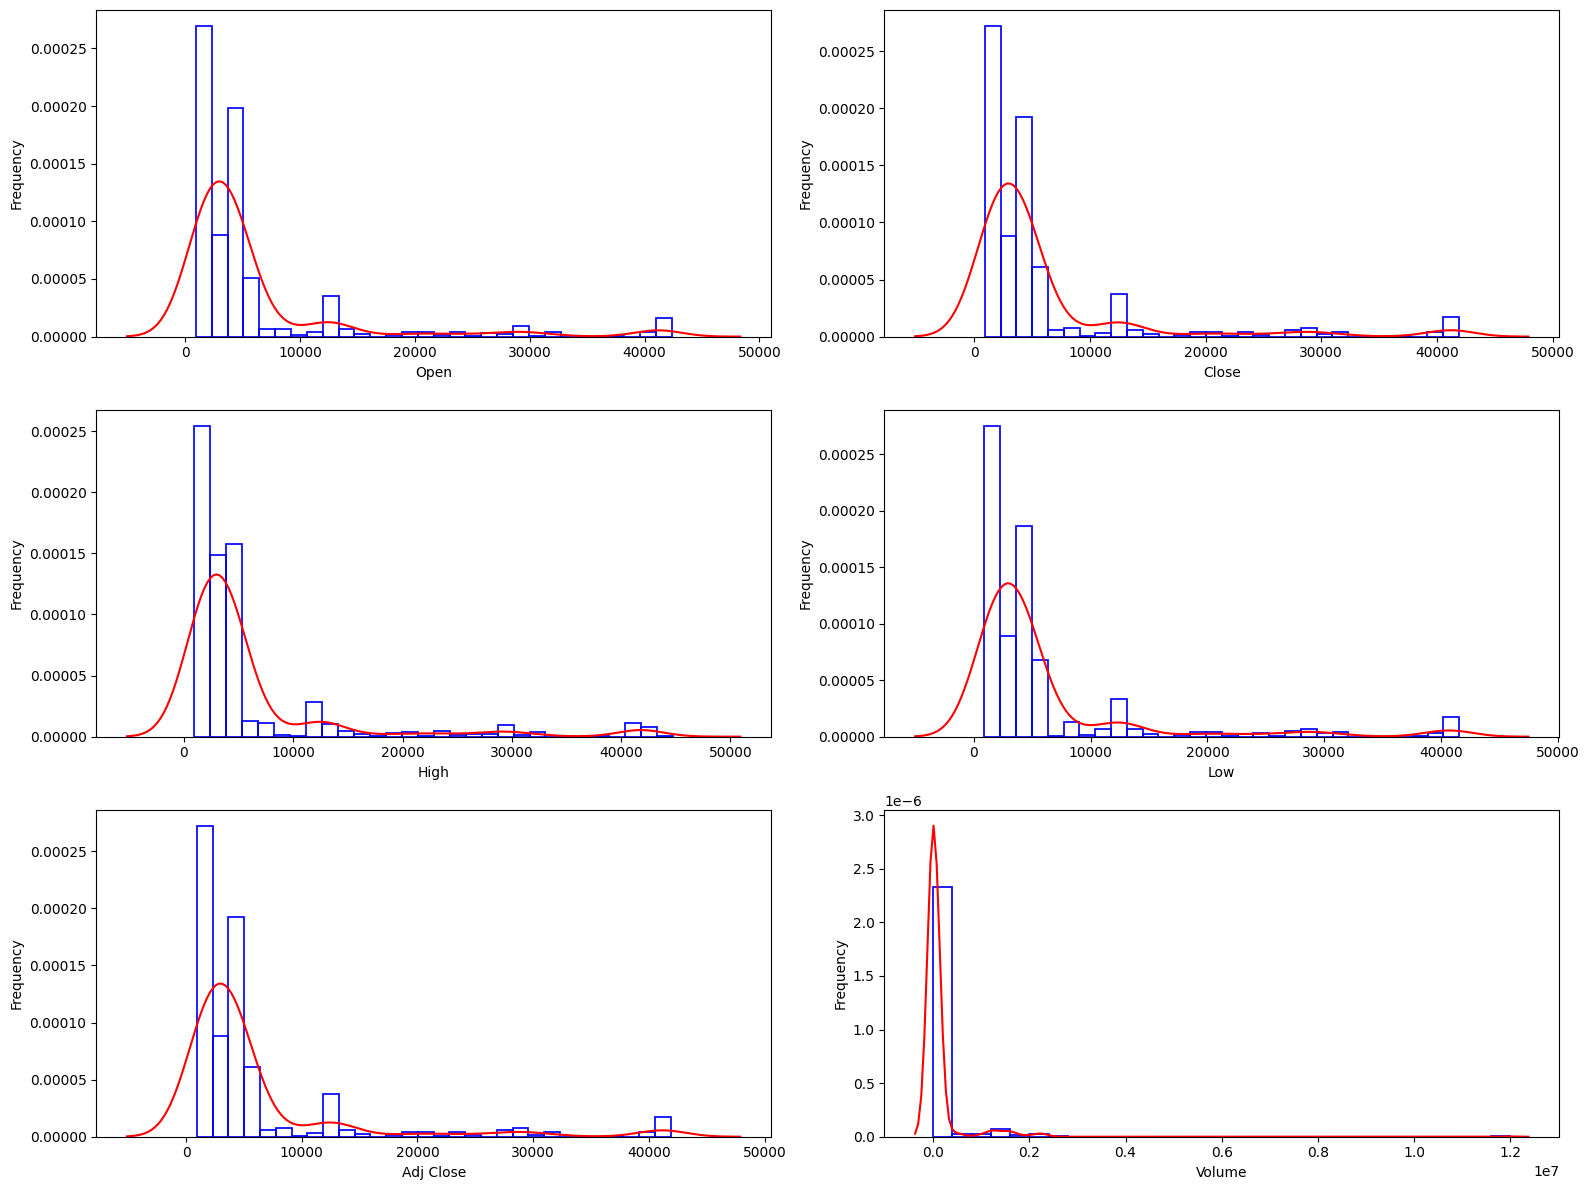

In [15]:
plot_histogram(dssa)

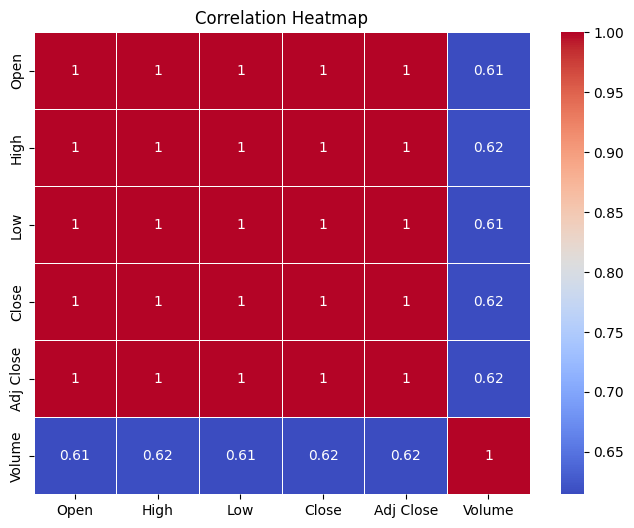

In [16]:
plot_correlation_heatmap(dssa)

# Pre-processing Data

## Cleaning Dataset

In [17]:
adro_missing = adro.isnull().sum()
dssa_missing = dssa.isnull().sum()

print("Missing values in ADRO:")
print(adro_missing)
print("\nMissing values in DSSA:")
print(dssa_missing)

Missing values in ADRO:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in DSSA:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [18]:
print("Data duplicate in ADRO: ", adro.duplicated().sum())
print("Data duplicate in DSSA: ", dssa.duplicated().sum())

Data duplicate in ADRO:  0
Data duplicate in DSSA:  0
